# Setting Everything Up

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 
from sklearn.feature_extraction.text import CountVectorizer

# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

pd.options.display.float_format = '{:,.0f}'.format

import string

%matplotlib inline

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
#To Download PDFs
from urllib.parse import urljoin

In [7]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [8]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)


R[write to console]: Loading required package: RColorBrewer

R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate




In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
%%R
library(vistime)
library(shiny)
library(plotly)
#for timeline plotting

R[write to console]: 
Attaching package: ‘plotly’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    last_plot


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: The following object is masked from ‘package:graphics’:

    layout




# Books 311 Dataset

#### This is not very helpful but just wanted to add it as background information
#### Perhaps a more accurate iteration will be pulling books_311 df from 311 data json below so though static it can always be recent

Source: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data

Filter for descriptor contains books

In [12]:
df_books_311 = pd.read_excel('books_311.xlsx')

In [13]:
df_books_311

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,37493222,2017-10-22 20:56:11,2019-02-01 14:54:34,TLC,Taxi and Limousine Commission,Found Property,Book/Stationery,Taxi,"11,211",875 METROPOLITAN AVENUE,METROPOLITAN AVENUE,ORIENT AVENUE,OLIVE STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,See notes for information.,2019-02-01 14:54:34,01 BROOKLYN,"3,029,120,036",BROOKLYN,"1,000,853","199,654",PHONE,Unspecified,BROOKLYN,NaN,NaN,La Guardia Airport,NaN,NaN,NaN,NaN,41,-74,"(40.71466527154591, -73.94010889799512)"
1,39506488,2018-06-19 23:05:38,2018-06-20 08:38:46,TLC,Taxi and Limousine Commission,Found Property,Book/Stationery,Taxi,"11,217",NaN,NaN,FLATBUSH AVENUE,FT GREENE PLACE,NaN,NaN,PLACENAME,BROOKLYN,BARCLAYS CENTER,NaN,Closed,NaT,The Taxi and Limousine Commission will keep a ...,NaT,02 BROOKLYN,"3,011,180,001",BROOKLYN,"991,034","188,046",PHONE,Unspecified,BROOKLYN,NaN,NaN,Grand Central Station,NaN,NaN,NaN,NaN,41,-74,"(40.68281699836376, -73.97554013353896)"
2,41041472,2018-11-26 23:23:00,2019-02-01 13:45:05,TLC,Taxi and Limousine Commission,Found Property,Book/Stationery,NaN,"10,017",888 2 AVENUE,2 AVENUE,EAST 47 STREET,EAST 48 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaT,See notes for information.,2019-02-01 13:45:05,06 MANHATTAN,"1,013,400,001",MANHATTAN,"992,636","213,689",ONLINE,Unspecified,MANHATTAN,NaN,NaN,Other,NaN,NaN,NaN,NaN,41,-74,"(40.75319949386173, -73.96973213960263)"
3,42942282,2019-06-11 15:21:39,2019-06-11 15:34:58,TLC,Taxi and Limousine Commission,Lost Property,Book/Stationery,Taxi,"10,121",NaN,NaN,WEST 32 STREET,WEST 33 STREET,WEST 32 STREET,WEST 33 STREET,PLACENAME,NEW YORK,PENNSYLVANIA STATION,NaN,Closed,NaT,See notes for information.,2019-06-11 19:34:58,05 MANHATTAN,"1,007,810,002",MANHATTAN,"986,437","212,546",UNKNOWN,Unspecified,MANHATTAN,NaN,NaN,WEST 32 STREET ANDWEST 33 STREETMANHATTAN,NaN,NaN,NaN,NaN,41,-74,"(40.75006595421169, -73.9921067617765)"
4,43068684,2019-06-23 13:34:16,2019-06-24 08:38:25,TLC,Taxi and Limousine Commission,Lost Property,Book/Stationery,NaN,"10,003",5 UNIVERSITY PLACE,UNIVERSITY PLACE,WASHINGTON SQUARE NORTH,WASHINGTON MEWS,WASHINGTON SQUARE NORTH,WASHINGTON MEWS,ADDRESS,NEW YORK,NaN,NaN,Closed,2019-06-30 13:34:16,See notes for information.,2019-06-24 12:38:25,02 MANHATTAN,"1,005,480,004",MANHATTAN,"985,535","205,572",ONLINE,Unspecified,MANHATTAN,NaN,NaN,5 UNIVERSITY PLACE MANHATTAN,NaN,NaN,NaN,NaN,41,-74,"(40.73092423524819, -73.99536355851659)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,33785450,2016-07-07 05:52:57,2019-02-01 13:44:52,TLC,Taxi and Limousine Commission,Found Property,Book/Stationery,NaN,"11,105",21-78 35 STREET,35 STREET,21 AVENUE,DITMARS BOULEVARD,NaN,NaN,ADDRESS,ASTORIA,NaN,NaN,Closed,NaT,See notes for information.,2019-02-01 13:44:52,01 QUEENS,"4,008,307,501",QUEENS,"1,009,659","221,791",ONLINE,Unspecified,QUEENS,NaN,NaN,Other,NaN,NaN,NaN,NaN,41,-74,"(40.77540484997966, -73.9082598804459)"
3297,34084907,2016-08-14 12:36:11,2019-02-01 14:14:16,TLC,Taxi and Limousine Commission,Found Property,Book/Stationery,NaN,"10,281",250 VESEY STREET,VESEY STREET,NORTH END WAY,NORTH END AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaT,See notes for information.,2019-02-01 14:14:16,01 MANHATTAN,"1,000,160,150",MANHATTAN,"979,904","199,599",ONLINE,Unspecified,MANHATTA

# Getting all 311 data

Source: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data

Get via API

In [14]:
# df_311= pd.read_json('https://data.cityofnewyork.us/resource/erm2-nwe9.json')
# df_311

### The below is as of Tuesday, March 21st 2023 at 3.48p.m.

In [15]:
# df_311.to_csv('df_311.csv')

# For whole 311 dataset

In [16]:
# df_whole_311=pd.read_csv('311_21032023.csv')
# df_whole_311

# Get Library Data

#### Starting with Queens

Source: https://data.cityofnewyork.us/Education/Queens-Library-Branches/kh3d-xhq7

In [17]:
# df_queens_json = pd.read_json('https://data.cityofnewyork.us/resource/kh3d-xhq7.json')
# df_queens_json

# Brooklyn Library

In [18]:
df_brooklyn_lib = pd.read_csv('BPL_Locations.csv')
df_brooklyn_lib.head(5)

,branch,address,phone,position,bus,subway,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,access,tags,path
0,Arlington Library,"203 Arlington Ave. at Warwick St. Brooklyn, NY...",718.277.6105,"40.680456600000, -73.887288700000",Q24;Q56,J,\n10:00am - 6:00pm,\n10:00am - 6:00pm,\n1:00pm - 8:00pm,\n10:00am - 8:00pm,\n10:00am - 6:00pm,\n10:00am - 5:00pm,NaN,Fully accessible,accessible;open now;,https://www.bklynlibrary.org/locations/arlington
1,Bay Ridge Library,"7223 Ridge Blvd. at 73rd St. Brooklyn, NY 11209",718.748.5709,"40.633650700000, -74.029523500000",B4;B9;B64;B70,R,\n10:00am - 6:00pm,\n10:00am - 6:00pm,\n10:00am - 8:00pm,\n1:00pm - 8:00pm,\n10:00am - 6:00pm,\n10:00am - 5:00pm,NaN,Fully accessible,accessible;open now;,https://www.bklynlibrary.org/locations/bay-ridge
2,Bedford Library,"496 Franklin Avenue Brooklyn, NY 11238",718.623.0012,"40.681817000000, -73.956194800000",B25;B26;B48;B49,C;S,\n10:00am - 6:00pm,\n10:00am - 6:00pm,\n1:00pm - 8:00pm,\n10:00am - 8:00pm,\n10:00am - 6:00pm,\n10:00am - 5:00pm,NaN,Fully accessible,accessible;open now;learning center;,https://www.bklynlibrary.org/locations/bedford
3,Borough Park Library,"1265 43rd St. at 13th Ave. Brooklyn, NY 11219",718.437.4085,"40.638920000000, -73.989122700000",B11;B16;B35,D,\n10:00am - 6:00pm,\n10:00am - 8:00pm,\n10:00am - 6:00pm,\n10:00am - 8:00pm,\n10:00am - 6:00pm,NaN,\n1:00pm - 5:00pm,Fully accessible,accessible;open now;book drop;open sundays,https://www.bklynlibrary.org/locations/borough...
4,Brighton Beach Library,16 Brighton First Rd. at Brighton Beach Ave. B...,718.946.2917,"40.576178400000, -73.966799500000",B1;B68,B;Q,\n10:00am - 6:00pm,\n1:00pm - 8:00pm,\n10:00am - 8:00pm,\n10:00am - 6:00pm,\n10:00am - 6:00pm,\n10:00am - 5:00pm,NaN,Fully accessible,accessible;open now;,https://www.bklynlibrary.org/locations/brighto...


In [19]:
# df_bklyn_electronic = pd.read_json('https://www.bklynlibrary.org/learning-resources/json')
# df_bklyn_electronic

#### Brooklyn Library electronic resources

##### In case helpful

In [20]:
# bklyn_elec_url='https://data.cityofnewyork.us/resource/ji82-xba5.json'
# bklyn_elec_raw_html = requests.get(bklyn_elec_url).content
    
# # soup_doc = BeautifulSoup(raw_html, "html.parser")


# bklyn_elec_raw_html
This has a b' in the intro and \n at the end that I need to figure out but since I doubt I will use it I am putting it off for now

# Facilities

In [21]:
# df_facilities_json = pd.read_json('https://data.cityofnewyork.us/resource/ji82-xba5.json')
# df_facilities_json

In [22]:
# df_whole_311['descriptor'].value_counts()


# Banned books in the world

Source of banned books in the world: https://en.wikipedia.org/wiki/List_of_books_banned_by_governments <br/>
Source of books in the world: World Digital Library <br/>
Source of banned books by decade: https://www.ala.org/advocacy/bbooks/frequentlychallengedbooks/top100 <br/>
Source of censorship attacks: https://www.everylibraryinstitute.org/book_censorship_database_magnusson <br/>
Source of censored books in India: https://en.wikipedia.org/wiki/List_of_books_banned_in_India
Other online searches for publication dates

In [23]:
#read csvs and excel files

df_digital_books=pd.read_csv('wdl_data_en.csv')

df_digital_books

,wdl_id,title,collection,description,title_in_original_language,wdl_url,handle,Type of Item,Institution,Photographer,Date Created,Subject Date,Place,Dewey Decimal Code,Additional Subjects,Physical Description,Creator,Publisher,Place of Publication,Language,Artist,Cartographer,Note,Delineator,Author,Surveyor,Compiler,Translator,Contributor,Engraver,Cinematographer,Director,Illustrator,Sponsor,Draftsman,Editor,Corrector,Responsible Party,Calligrapher,Interviewee,Interviewer,Associated Name,Printer,Lithographer,Donor,Recording Engineer,Musician,Composer,Architect,References,Attributed Name,Dedicatee,Signer,Copyright Holder,Collector,Printmaker,Copyright claimant,Performer,Owner,Commentator,Etcher,Wood-engraver,Scribe,"Author of Introduction, etc.","Author of Afterword, Colophon, etc.",Scientific advisor,Speaker,Commentator for Written Text,Illuminator,Librettist,Client,Transcriber,Collaborator,Producer,Videographer,Vocalist,Patron,Funder,Annotator,Woodcutter,Designer,Author in Quotations or Text Extracts,Lyricist,Type Designer,Animator,Writer of added text,Project Director,Dubious Author,Censor,Engineer,Lead,Publishing Director,Singer,Binder,Originator,Typographer,Book producer,Narrator,Colorist,Arranger,Recipient,Correspondent
0,1,"Antietam, Maryland. Allan Pinkerton, President...",NaN,"At the outset of the U.S. Civil War, Mathew Br...","Antietam, Maryland. Allan Pinkerton, President...",https://www.wdl.org/en/item/1,https://hdl.loc.gov/loc.wdl/wdl.1,"Prints, Photographs",Library of Congress,"Gardner, Alexander, 1821-1882",1862-10-03,1862-10-03,North America > United States of America > Mar...,973,"Antietam, Battle of, Maryland, 1862|Generals|L...","1 negative : glass, wet collodion",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Chola Woman, Full-Length Portrait, Standing, F...",Frank and Frances Carpenter Collection,This photograph of a Bolivian woman is from th...,NaN,https://www.wdl.org/en/item/2,https://hdl.loc.gov/loc.wdl/wdl.2,"Prints, Photographs",Library of Congress,"Vargas, Max T., 1874–1959",1911,1900/1923,Latin America and the Caribbean > Bolivia > La...,391,Portrait photographs|Women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Maps of Ezo, Sakhalin, and Kuril Islands",NaN,This map was made by Fujita Junsai and publish...,蝦夷闔境輿地全図,https://www.wdl.org/en/item/3,https://hdl.loc.gov/loc.wdl/wdl.3,Maps,Library of Congress,NaN,1854,1854,East Asia > Japan > Hokkaido|Europe > Russian ...,912,NaN,"1 color map, 115 x 92 centimeters, folded in c...","Fujita, Tonsai",Harimaya Katsugorō,Edo,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Warrior Asahina Kobayashi,Japanese Prints and Drawings Collection,The Japanese art of Ukiyo-e (“Pictures of the ...,Kobayashi no Asahina,https://www.wdl.org/en/item/4,https://hdl.loc.gov/loc.wdl/wdl.4,"Prints, Photographs",Library of Congress,NaN,1862,1862,East Asia > Japan,769|792,Actors|Costumes|Japanese drama|Portrait prints...,"1 print: woodcut, color ; 29.0 x 21.3 centimeters",NaN,NaN,NaN,Japanese,"Utagawa, Toyokuni, 1786-1865",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [24]:
xl_book_censorship_attacks=pd.ExcelFile('book_censorship_attacks.xlsx')
xl_book_censorship_attacks.sheet_names

['Books Challenged Schools 21-22',
 'Books Challenge 22-23',
 'New Groups',
 'By School District 21-22',
 'Books Challenged Schools 2020-2',
 'Groups Formed In Response To Th',
 'Books Challenged Public Librari',
 'By Public LIbraries',
 'Other Relevant Articles',
 'Books Targeted By Groups',
 'Groups Formed To Ban Books',
 'KEY',
 'Rep Krause 850 Texas Book List',
 'Krause List By Author',
 'NorthEastISD Texas']

In [25]:
df_challenged_2122 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenged Schools 21-22')
df_challenged_2223 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenge 22-23')
df_new_groups = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='New Groups')
df_school_district_2122 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='By School District 21-22')
df_school_district_2021 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenged Schools 2020-2')
df_challenging_groups = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Groups Formed In Response To Th')
df_challenged_public_libs = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenged Public Librari')
df_by_public_libs = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='By Public LIbraries')
df_relevant_articles = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Other Relevant Articles')
df_targeted_by_groups = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Targeted By Groups')
df_groups_to_ban_books = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Groups Formed To Ban Books')
df_key = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='KEY')
df_krause_texas_books = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Rep Krause 850 Texas Book List')
df_krause_texas_author = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Krause List By Author')
df_northeastISD = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='NorthEastISD Texas')




## Exploring number of books banned in the two most recent years

In [26]:
df_challenged_2223.shape

(2131, 43)

In [27]:
df_challenged_2122.shape

(4023, 16)

In [28]:
df_number_of_books_recent=pd.read_csv('number_of_books_challenged.csv')
df_number_of_books_recent

,Year,number_of_books_banned_or_challenged
0,2021-2022,2131
1,2022-2023,4023


### Here is the resulting chart:
https://www.datawrapper.de/_/Ppfvq/

# Starting exploration of banned books by country
Source: https://en.wikipedia.org/wiki/List_of_books_banned_by_governments

In [29]:
df_banned_books_by_country=pd.read_csv('banned_books_by_country.csv')
df_banned_books_by_country

,title,author_s,year_published,year_published_with_complex,date_range,end_date,end_date_r,Year_Banned,year_unbanned,type,notes,country,nation_or_state,state
0,Lethal Marriage,Nick Pron,1995,1995,1951_to_date,1995,1996,NaN,NaN,True crime,Written by a newspaper reporter about the Paul...,Canada,NaN,NaN
1,Thalia,Arius (AD 250 or 256 – 336),NaN,_complex_dates,_complex_dates,NaN,1,NaN,NaN,"Theological tract, partly in verse",Banned in the Roman Empire in the 330s+ for co...,Roman Empire,NaN,NaN
2,Fazail-e-Amaal,Muhammad Zakariya Kandhlawi,Sometime between the 1920s and 1950s,_complex_dates,_complex_dates,Sometime between the 1920s and 1950s,_complex_end_date,NaN,NaN,Sufi evangalism,Currently banned in Saudi Arabia.[218][219],Saudi Arabia,NaN,NaN
3,The Canterbury Tales,Geoffrey Chaucer,late 14th century,_complex_dates,_complex_dates,late 14th century,_complex_end_date,NaN,NaN,Story collection,Banned from US mail under the Federal Anti-Obs...,United States,NaN,NaN
4,Curved River,Živojin Pavlović,1963,1963,1951_to_date,1963,1964,NaN,NaN,Story collection,In 1963 in Yugoslavia withdrawn by the publish...,Yugoslavia,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,The Face of Mother India,Katherine Mayo,1936,1936,1801_to_1950,1936,1937,NaN,NaN,Unspecifiied,"It cannot be imported into India.[6] In 1927, ...",India,nationwide,NaN
391,Old Soldier Sahib,Frank Richards,1936,1936,1801_to_1950,1936,1937,NaN,NaN,Unspecifiied,The book cannot be imported into India.[6] The...,India,nationwide,NaN
392,Hindu Heaven,Max Wylie,1934,1934,1801_to_1950,1934,1935,NaN,NaN,Unspecifiied,"It cannot be brought into India.[6] Max Wylie,...",India,nationwide,NaN
393,Angarey,Various,1933,1933,1801_to_1950,1933,1934,NaN,NaN,Unspecifiied,"This collection of stories by Sajjad Zaheer, A...",India,nationwide,NaN


# Exploring the most banned book titles by countries

In [30]:
df_banned_books_by_country.title.value_counts().head(10)

The Satanic Verses (1988)         15
Works                             11
Lolita (1955)                      5
Mein Kampf (1925)                  5
Borstal Boy                        3
Lady Chatterley's Lover (1928)     3
Animal Farm                        3
Droll Stories                      3
Brave New World                    2
The Satanic Verses                 2
Name: title, dtype: int64

#### Rushdie's The Satanic Verses has been banned three times as much as the second most banned book globally
Resulting chart: https://public.flourish.studio/visualisation/13196372/

# Exploring the countries banning books most often

In [31]:
df_banned_books_by_country.country.value_counts().head(10)

India             60
China             34
Singapore         32
Ireland           24
United States     20
Australia         20
Germany           16
Spain             16
Russia            15
United Kingdom    14
Name: country, dtype: int64

In [32]:
df_country_count=df_banned_books_by_country.country.value_counts()
df_country_count.to_csv('df_country_count.csv')

#### India has the most banned specific individual book titles but Indonesia has banned all Chinese literature in bulk
Resulting chart: https://app.datawrapper.de/map/z6p8P/publish

# Exploring the types of books banned the most

In [33]:
df_type_count=df_banned_books_by_country.type.value_counts()
df_type_count.to_csv('df_type_count.csv')

#### Nearly double the number of novels are banned compared to non-fiction books, including 67% of the 6 most banned books
Resulting chart: https://app.flourish.studio/visualisation/13197121/edit

# Reading the banned books file in R

In [34]:
%%R

df_banned_books_by_country_r<-read_csv('banned_books_by_country.csv')


Rows: 395 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): title, author_s, year_published, year_published_with_complex, date...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Developing a plot to see the trends in banning across the years

### Dot plot

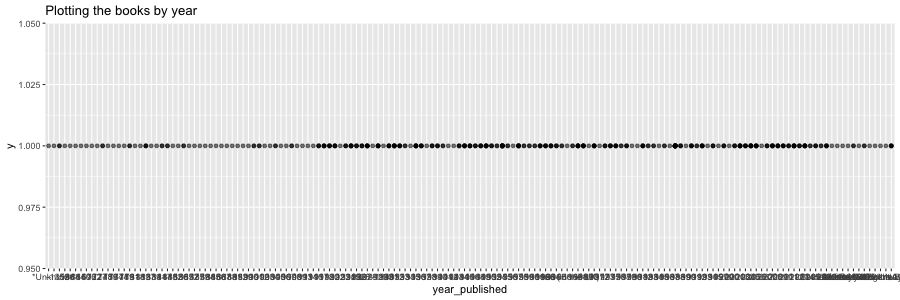

In [35]:
%%R -h 300 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=year_published, y=1, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Plotting the books by year',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")


#### Range of years exists
However, there is a lot of overlap, perhaps jitter plot will help

## Jitter plot

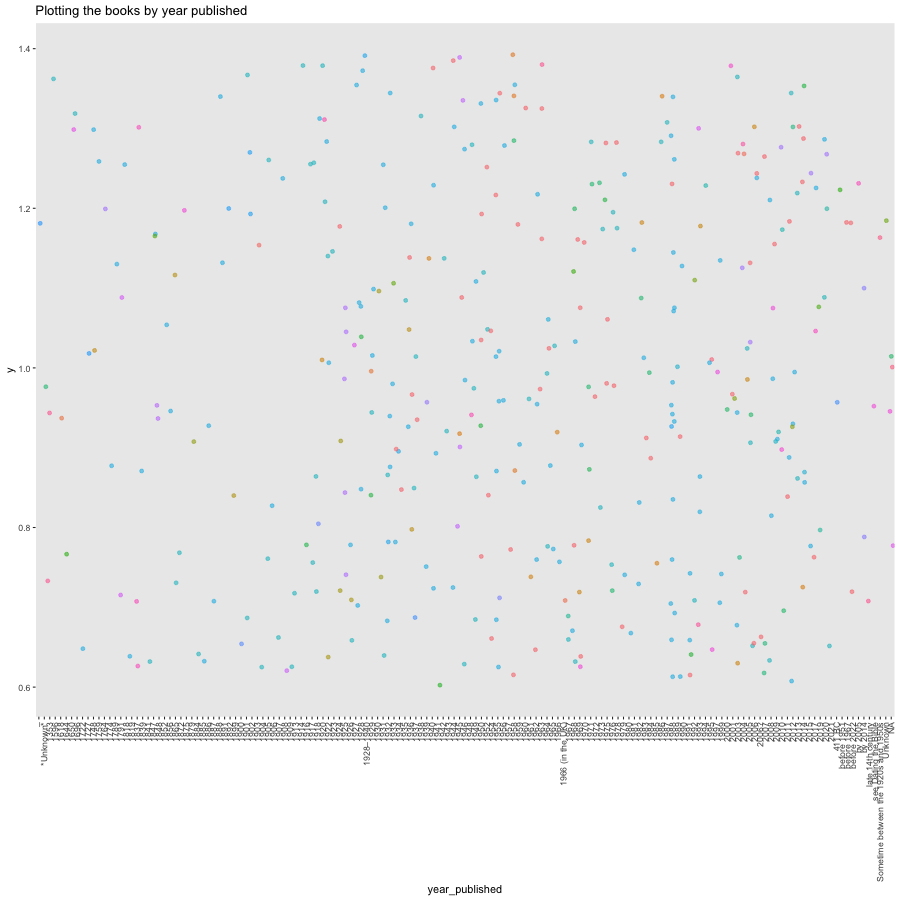

In [36]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=year_published, y=1, alpha=.05, color=type) + 
    geom_jitter() +
    labs(
        title='Plotting the books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())


In [37]:
df_banned_books_by_country.year_published.value_counts().head(10)

1988    18
1955    10
2003     6
1969     6
2012     6
2014     6
1932     6
1968     6
1958     6
1950     6
Name: year_published, dtype: int64

In [38]:
df_banned_books_by_country

,title,author_s,year_published,year_published_with_complex,date_range,end_date,end_date_r,Year_Banned,year_unbanned,type,notes,country,nation_or_state,state
0,Lethal Marriage,Nick Pron,1995,1995,1951_to_date,1995,1996,NaN,NaN,True crime,Written by a newspaper reporter about the Paul...,Canada,NaN,NaN
1,Thalia,Arius (AD 250 or 256 – 336),NaN,_complex_dates,_complex_dates,NaN,1,NaN,NaN,"Theological tract, partly in verse",Banned in the Roman Empire in the 330s+ for co...,Roman Empire,NaN,NaN
2,Fazail-e-Amaal,Muhammad Zakariya Kandhlawi,Sometime between the 1920s and 1950s,_complex_dates,_complex_dates,Sometime between the 1920s and 1950s,_complex_end_date,NaN,NaN,Sufi evangalism,Currently banned in Saudi Arabia.[218][219],Saudi Arabia,NaN,NaN
3,The Canterbury Tales,Geoffrey Chaucer,late 14th century,_complex_dates,_complex_dates,late 14th century,_complex_end_date,NaN,NaN,Story collection,Banned from US mail under the Federal Anti-Obs...,United States,NaN,NaN
4,Curved River,Živojin Pavlović,1963,1963,1951_to_date,1963,1964,NaN,NaN,Story collection,In 1963 in Yugoslavia withdrawn by the publish...,Yugoslavia,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,The Face of Mother India,Katherine Mayo,1936,1936,1801_to_1950,1936,1937,NaN,NaN,Unspecifiied,"It cannot be imported into India.[6] In 1927, ...",India,nationwide,NaN
391,Old Soldier Sahib,Frank Richards,1936,1936,1801_to_1950,1936,1937,NaN,NaN,Unspecifiied,The book cannot be imported into India.[6] The...,India,nationwide,NaN
392,Hindu Heaven,Max Wylie,1934,1934,1801_to_1950,1934,1935,NaN,NaN,Unspecifiied,"It cannot be brought into India.[6] Max Wylie,...",India,nationwide,NaN
393,Angarey,Various,1933,1933,1801_to_1950,1933,1934,NaN,NaN,Unspecifiied,"This collection of stories by Sajjad Zaheer, A...",India,nationwide,NaN


# How can this visualisation of timelines be reader facing?

### Exploring how other people have made timelines

In [39]:
# %%R

# library(timevis)

# data_timeline <- df_banned_books_by_country_r.frame(
#   id      = df_banned_books_by_country_r$Title,
#   content = df_banned_books_by_country_r$Title,
#   start   = df_banned_books_by_country_r$year_published,
#   end     = df_banned_books_by_country_r$year_published
# )

# timevis(data_timeline)

#### How one person did it

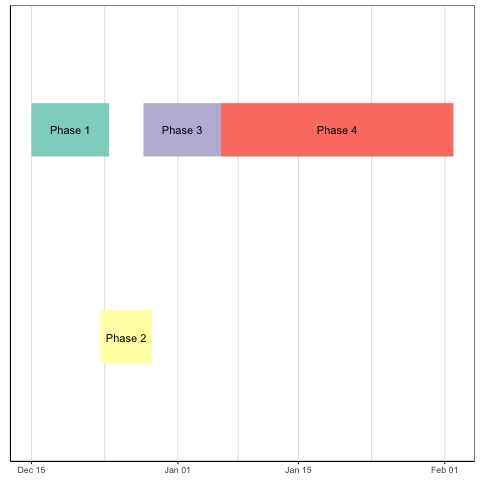

In [40]:
%%R
library(vistime)
library(shiny)
library(plotly)



data <- read.csv(text="event,start,end
                       Phase 1,2020-12-15,2020-12-24
                       Phase 2,2020-12-23,2020-12-29
                       Phase 3,2020-12-28,2021-01-06
                       Phase 4,2021-01-06,2021-02-02")
        
gg_vistime(data, optimize_y = TRUE, linewidth = 25)

#### How another person did it

In [41]:
# %%R

# device.data <- data.frame(
#     DeviceName = c("Cypher Sirolimus DES", "Taxus Express 2", "Cypher Select Sirolimus DES",
#               "Cypher Select Plus Sirolimus DES", "Taxus Liberte", "Endeavor ABT578",
#               "Endeavor Sprint Zotarolimus DES", "Xience V", "Taxus Element Monrail ION",
#               "Xience Nano", "Promus Element Plus", "Xience Prime",
#              "Endeavor Resolute DES","Endeavor Resolute Integrity DES", "Promus Premier", "Xience Xpedition LL and SV"),
#     DeviceManufacturer = c("Cordis Cashel","Boston Scientific","Cordis Cashel",
#                      "Cordis Cashel","Boston Scientific","Medtronic Inc",
#                      "Medtronic Inc", "Abbott Vascular", "Boston Scientific",
#                      "Abbott Vascular","Boston Scientific", "Abbott Vascular",
#                      "Medtronic Inc", "Medtronic Inc","Boston Scientific", "Abbott Vascular"),
#     start_date = as.Date(c("2002-11-15", "2003-09-09", "2005-10-21", 
#                      "2006-10-25","2008-02-05", "2008-02-27",
#                      "2009-06-10", "2009-08-21", "2011-08-19",
#                      "2011-10-24", "2012-01-30", "2012-04-10",
#                      "2012-04-14", "2013-03-07", "2013-09-30", "2014-02-19")),
#     end_date = as.Date(c("2007-07-18", "2010-11-10", "2007-07-18",
#                    "2013-04-05", "2013-11-01", "2016-03-31",
#                    "2016-03-31", "2016-03-31", "2011-09-16",
#                    "2016-03-31", "2016-03-31", "2016-03-31",
#                    "2016-03-31", "2016-03-31", "2016-03-31", "2016-03-31")),
#     stringsAsFactors = FALSE
#     )
# #data visualization
# vistime(device.data, events = "DeviceName", groups = "DeviceManufacturer", 
#                      start = "start_date", end = "end_date")


## Attempt at replicating

In [42]:
# %%R


# device.data <- df_banned_books_by_country_r.frame(
#     Title = as.list(df_banned_books_by_country_r$Title),
#     Year = as.list(df_banned_books_by_country_r$year_published),
#     start_date = as.Date(as.list(df_banned_books_by_country_r$year_published)),
#     end_date = as.Date(as.list(df_banned_books_by_country_r$end_date_r)),
#     stringsAsFactors = FALSE
#     )
# #data visualization
# vistime(device.data, events = "Title", groups = "Year", 
#                      start = "start_date", end = "end_date")


In [43]:
# %%R

# device.data <- df_banned_books_by_country_r.frame(
#     Title = c(df_banned_books_by_country_r$Title),
#     Year = c(df_banned_books_by_country_r$year_published),
#     start_date = as.Date(c(df_banned_books_by_country_r$year_published)),
#     end_date = as.Date(c(df_banned_books_by_country_r$year_published)),
#     stringsAsFactors = FALSE
#     )
# #data visualization
# vistime(device.data, events = "Title", groups = "Year", 
#                      start = "start_date", end = "end_date")


# After conversation with Aisvarya, considering rerouting from Gantt chart to this kind of chart

Every Hindi film song by Lata Mangeshkar, in one graphic: https://www.hindustantimes.com/static/lata-mangeshkar-every-hindi-film-song-one-graphic/

#### Starting with dot plot

# I need plots for:
* time trend overall
* time trend by types of books
* time trend by country? (not sure, maybe the first fluorish parchment graph is sufficient)
* time trend by authors? (not sure, maybe tmi...yea actually it would be like the same as time trend by titles which would be too much, maybe instead add authors to pop up of fluorish parchment graph)
* highlight most affected authors


# Time trend overall

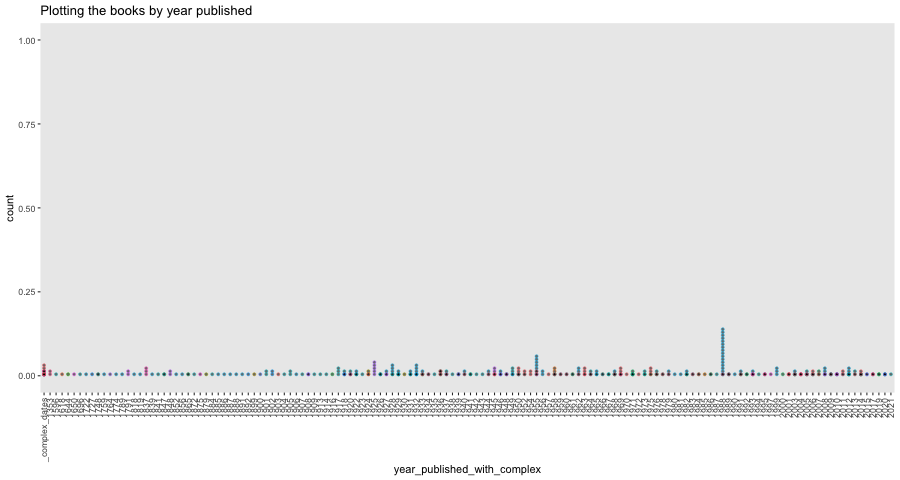

In [44]:
%%R -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=year_published_with_complex, alpha=.05, color=type) + 
    geom_dotplot(binwidth = 0.5) +
    labs(
        title='Plotting the books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

### Flipping this

Unlikely to be the right thing but just checking

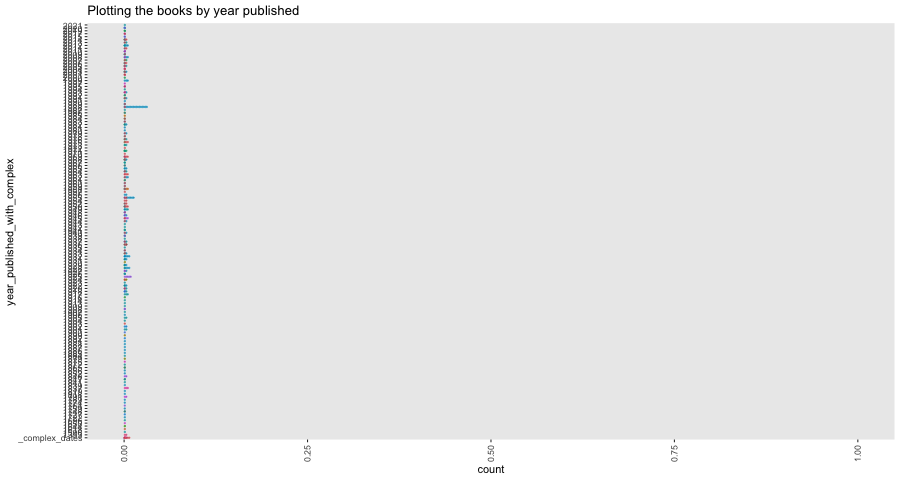

In [45]:
%%R -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=year_published_with_complex, alpha=.05, color=type) + 
    geom_dotplot(binwidth = 0.5) +
    labs(
        title='Plotting the books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

## Time trend in larger bins

# Dot plots
### to show time trend for all books banned


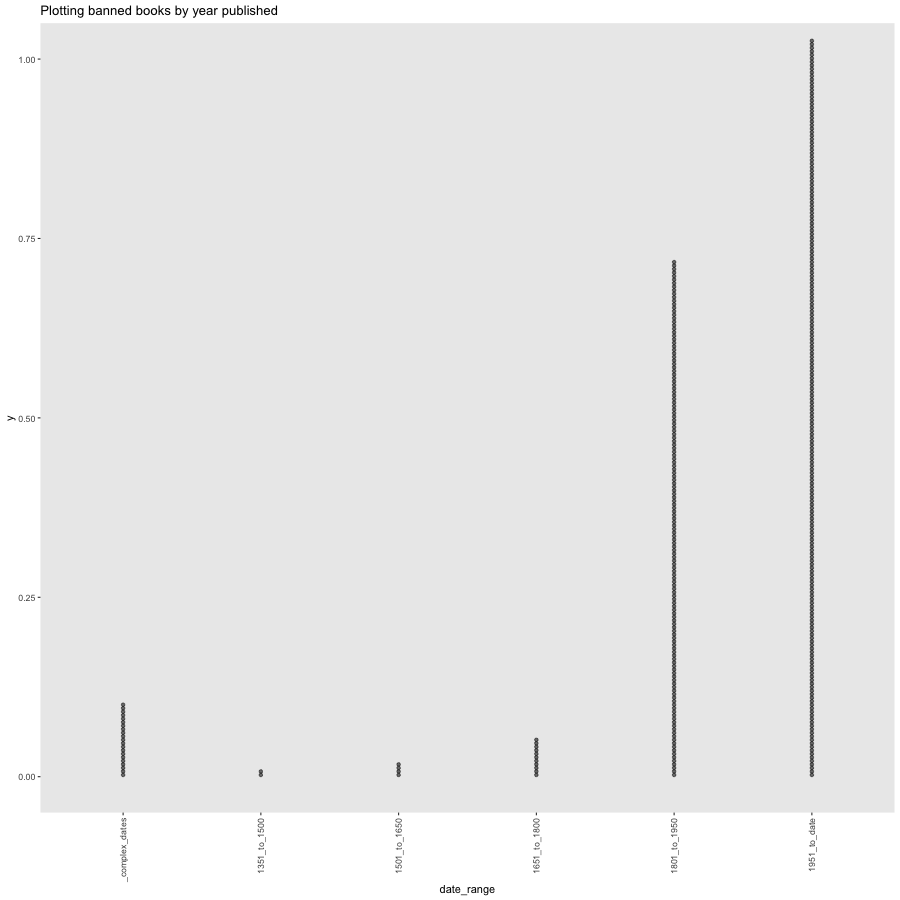

In [46]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=date_range, y=1, alpha=.05) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting banned books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
#     theme_void()

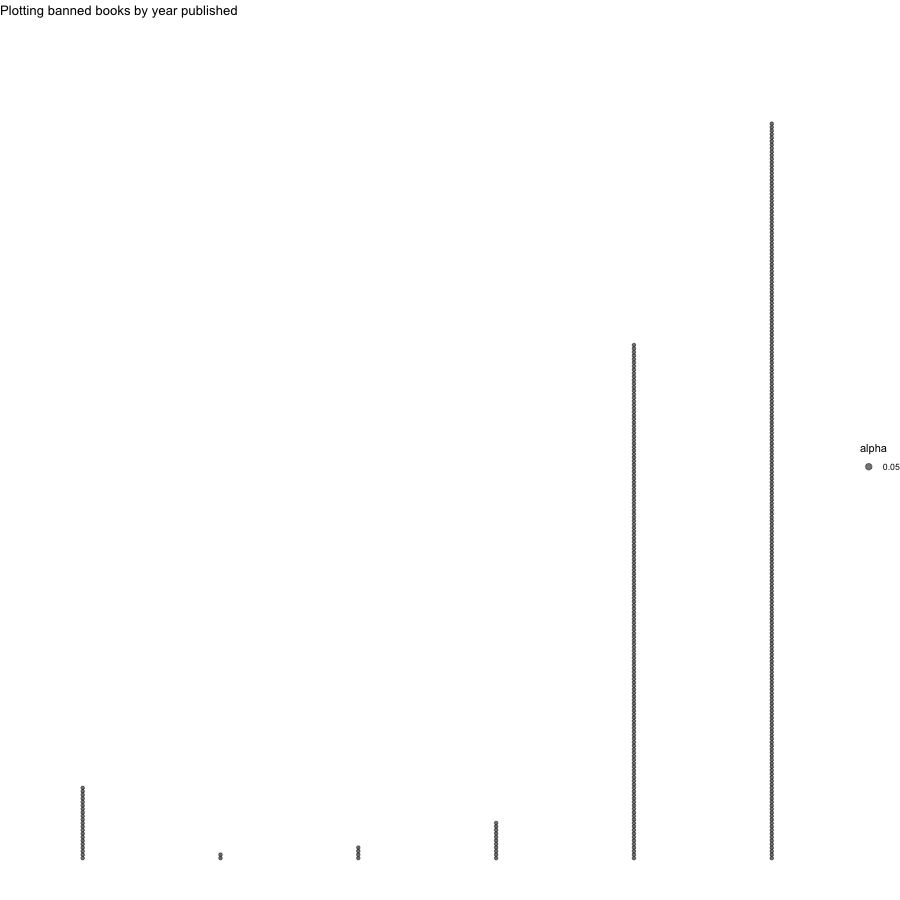

In [47]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=date_range, y=1, alpha=.05) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting banned books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    theme_void()

In [48]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=date_range, y=1, alpha=.05) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting banned books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    theme_void()
    ggsave("book_by_year_bins.svg")

Saving 12.5 x 12.5 in image


In [49]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=date_range, y=1, alpha=.05) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting banned books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    theme_void()+
    coord_flip()

ggsave("book_by_year_bins_wide.svg")

Saving 12.5 x 12.5 in image


### Turning this around

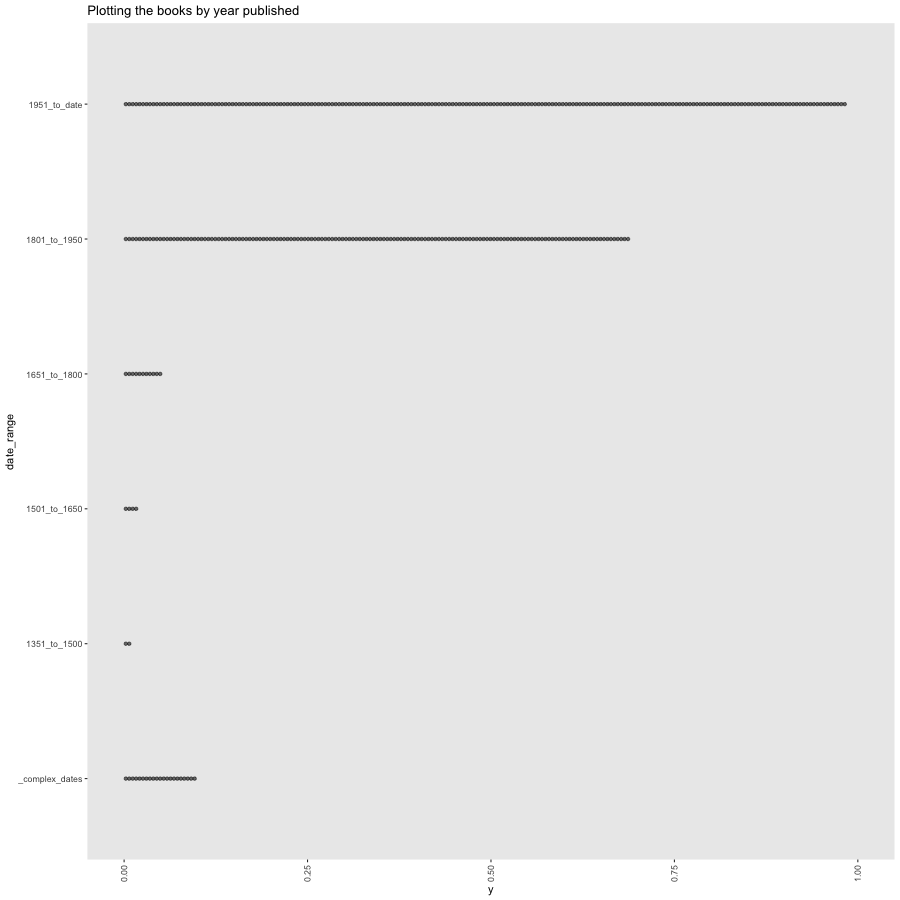

In [50]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=date_range, y=1, alpha=.05, dotsize=0.05) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting the books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

# to also show types of books banned over time

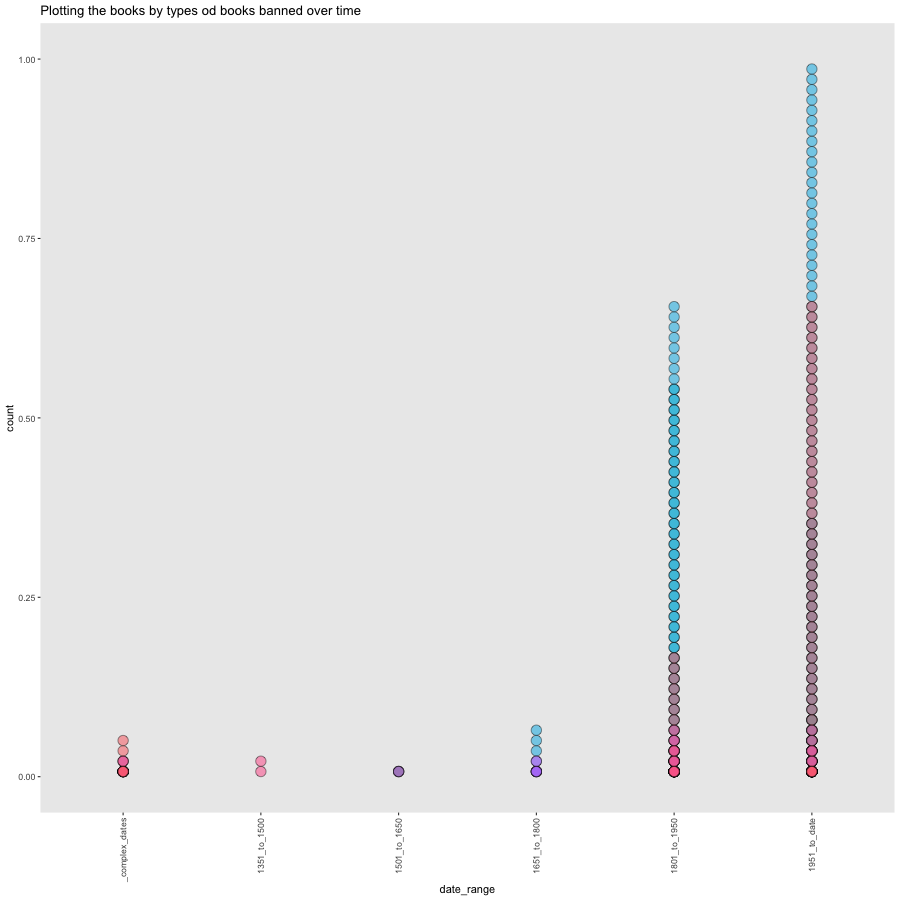

In [58]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=date_range, alpha=.05, fill=type) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.25) +
    labs(
        title='Plotting the books by types od books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

### Try turning it around

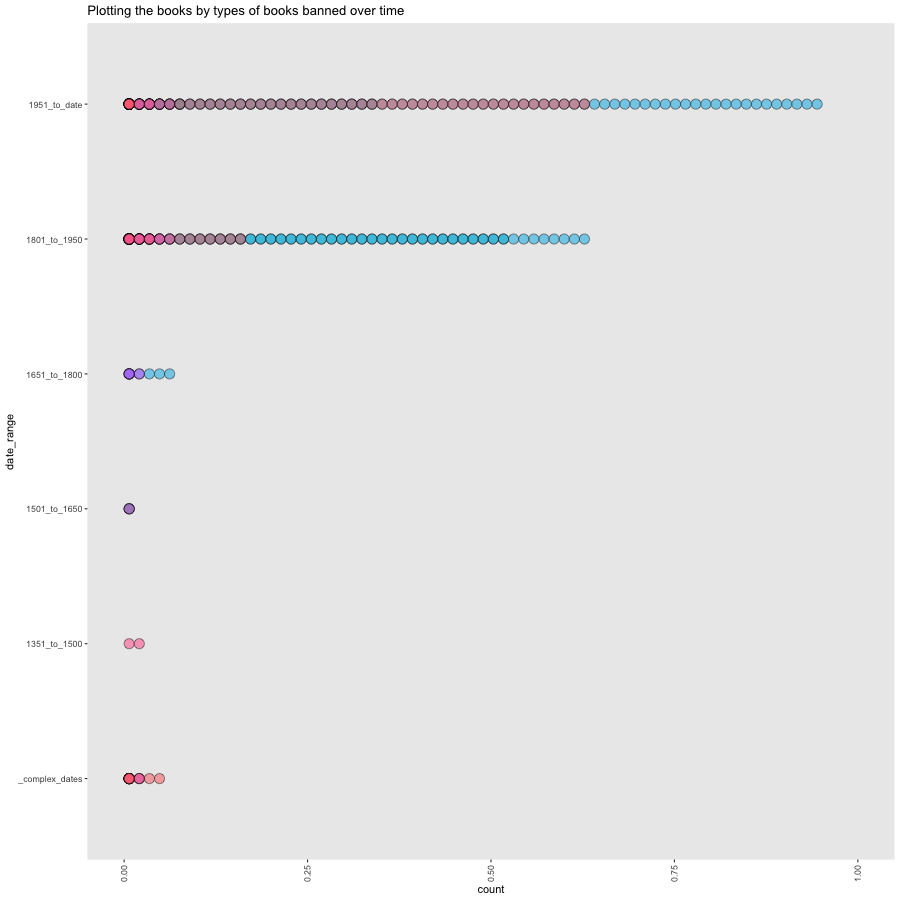

In [62]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=date_range, alpha=.05, fill=type) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.25) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

# to also show countries banning over time

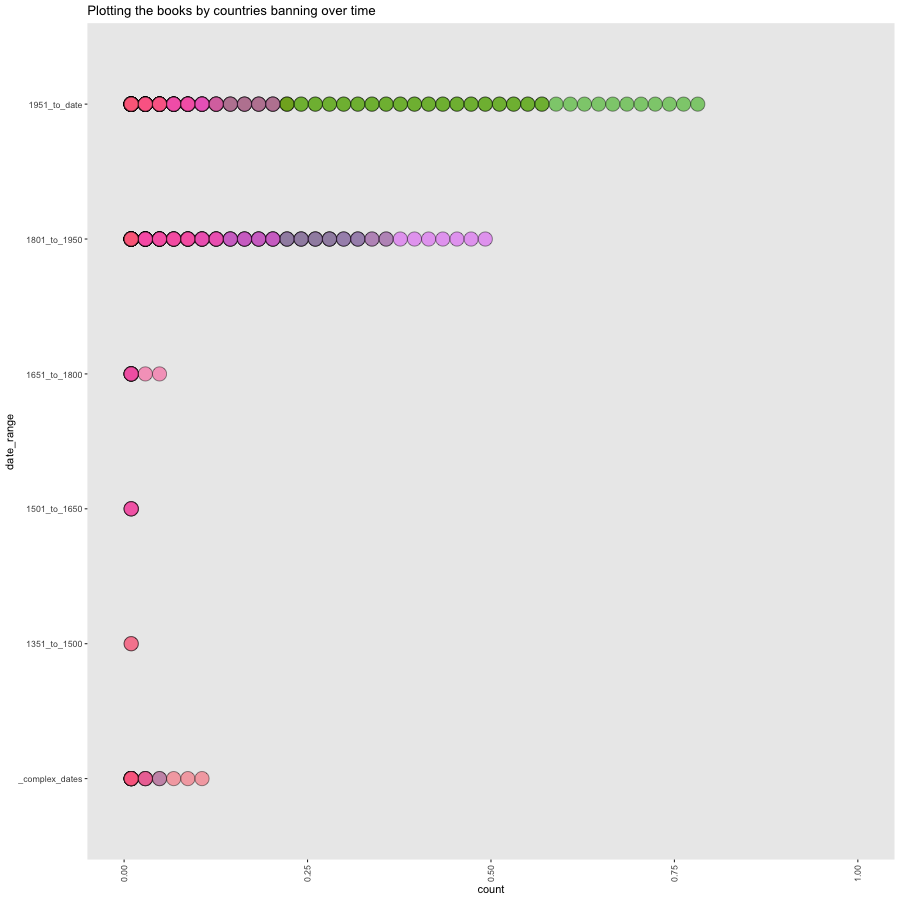

In [53]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=date_range, alpha=.05, fill=country) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.35) +
    labs(
        title='Plotting the books by countries banning over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

### Try turning it around

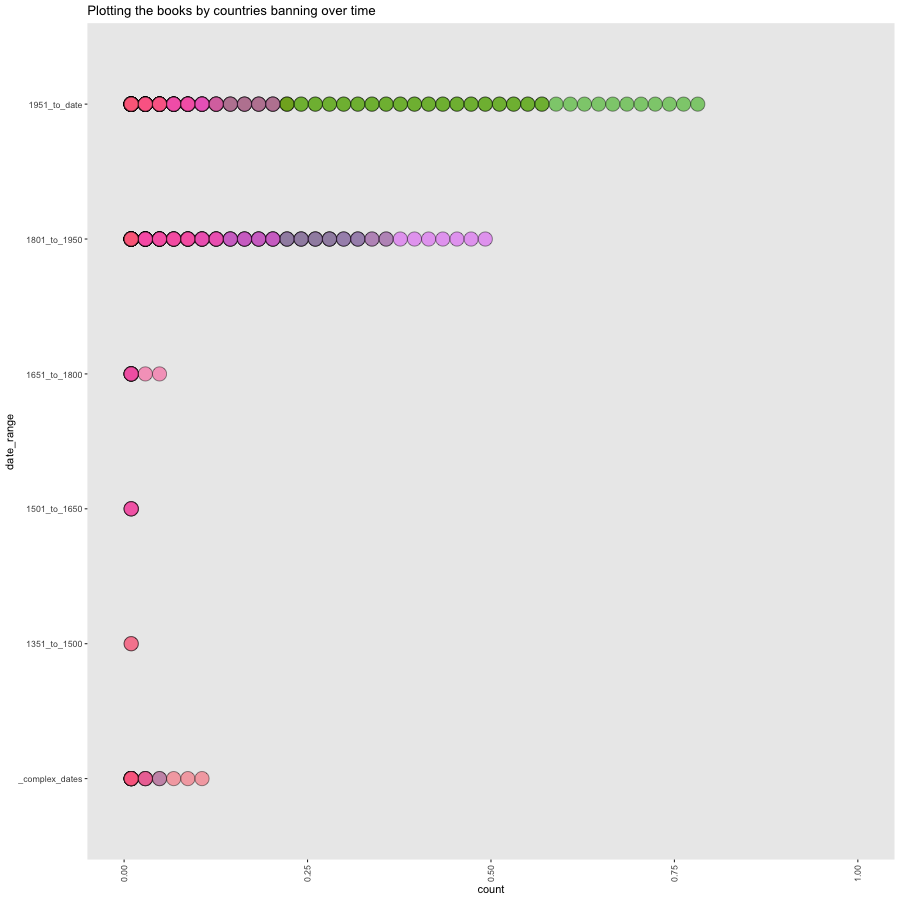

In [54]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=date_range, alpha=.05, fill=country) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.35) +
    labs(
        title='Plotting the books by countries banning over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ 
    coord_flip()

# Replicating raw graphs gantt chart by country from raw graphs but in dot format...



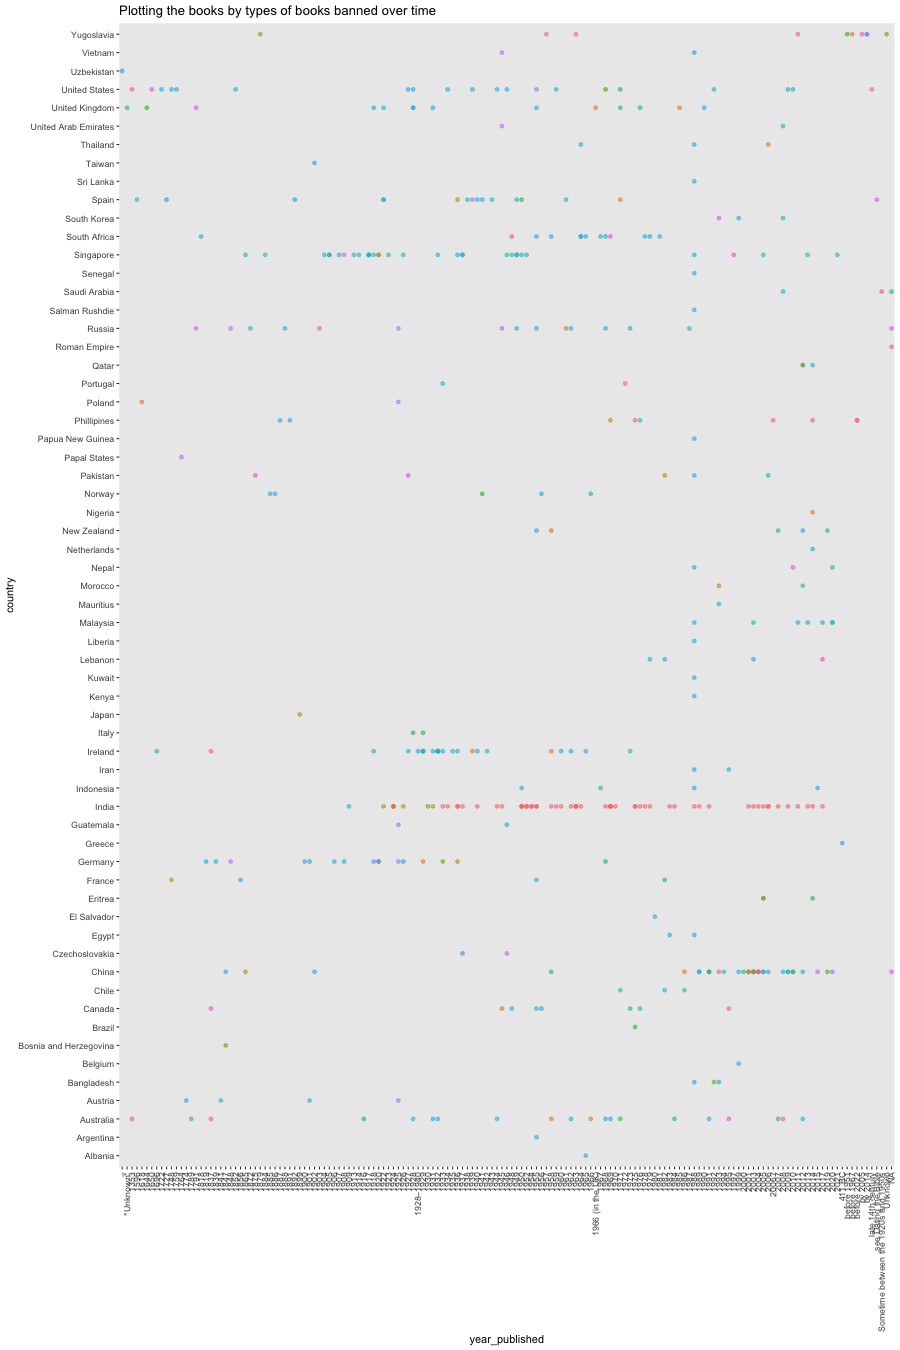

In [55]:
%%R -h 1350 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=year_published, y=country, alpha=.05, colour=type, dotsize=0.05) + 
    geom_point(binwidth = 0.3, dotsize=0.25) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

#### Fluorish did a better job with this series of dot plots here: 
https://public.flourish.studio/visualisation/13204320/